<a href="https://colab.research.google.com/github/yasirjumani/Predicting-House-Prices-Using-Machine-Learning/blob/main/house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Housing Price Prediction

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import StackingRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score

### ==========================
### Step 1: Load and Explore Dataset
### ==========================

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/housing project/Housing.csv')
print("Dataset Overview:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Overview:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Missing Values:
 price               0
area                0
bedrooms          

### ==========================
### Step 2: Feature Engineering
### ==========================

In [4]:
# Feature Engineering
df['price_per_sqft'] = df['price'] / df['area']  # Price per square foot
df['total_bathrooms'] = df['bathrooms'] + df['stories']  # Total bathrooms (including stories)
df['bed_bath_ratio'] = df['bedrooms'] / (df['bathrooms'] + 1)  # Bedroom-to-bathroom ratio

# Display the updated DataFrame to verify the new features
print("Feature Engineering Completed. Updated Dataset:")
df.head()


Feature Engineering Completed. Updated Dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_per_sqft,total_bathrooms,bed_bath_ratio
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1792.452830,5,1.333333
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1367.187500,8,0.800000
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1229.919679,4,1.000000
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1628.666667,4,1.333333
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1537.735849,3,2.000000


### ==========================
### Step 3: Exploratory Data Analysis (EDA)
### ==========================

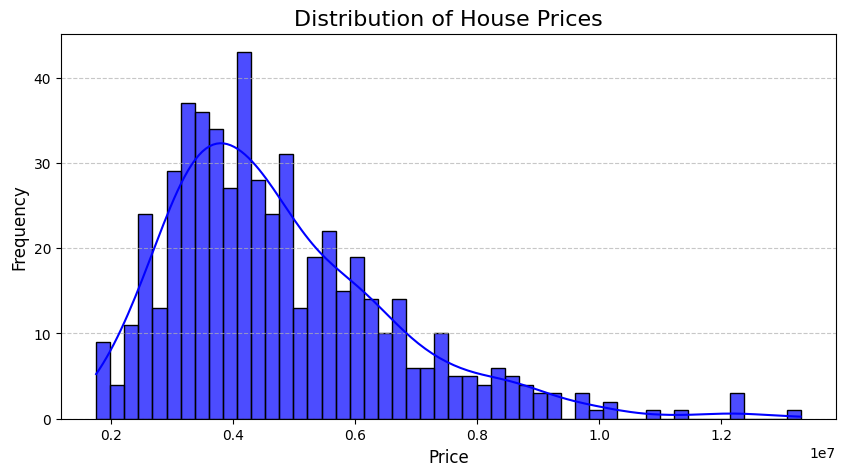

In [5]:
# 1. Distribution of House Prices
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True, color='blue', alpha=0.7)
plt.title("Distribution of House Prices", fontsize=16)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

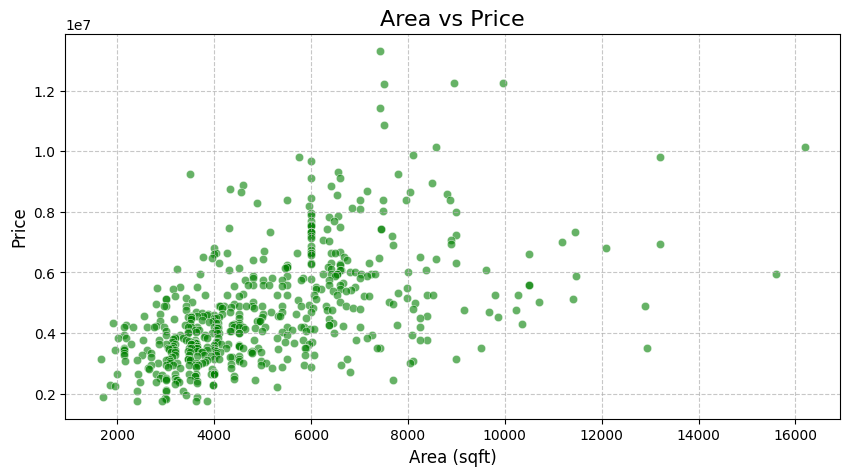

In [6]:
# 2. Scatterplot: Area vs. Price
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['area'], y=df['price'], color='green', alpha=0.6)
plt.title("Area vs Price", fontsize=16)
plt.xlabel("Area (sqft)", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

<ipython-input-7-8c5bf4101058>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['bathrooms'], y=df['price'], palette='coolwarm')


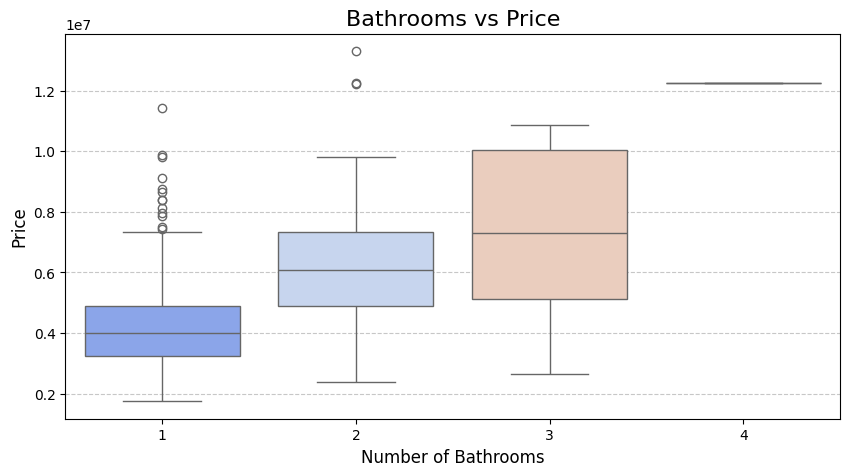

In [7]:
# 3. Boxplot: Bathrooms vs. Price
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['bathrooms'], y=df['price'], palette='coolwarm')
plt.title("Bathrooms vs Price", fontsize=16)
plt.xlabel("Number of Bathrooms", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-8-58bf1cf1b3ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['stories'], y=df['price'], palette='Set3')


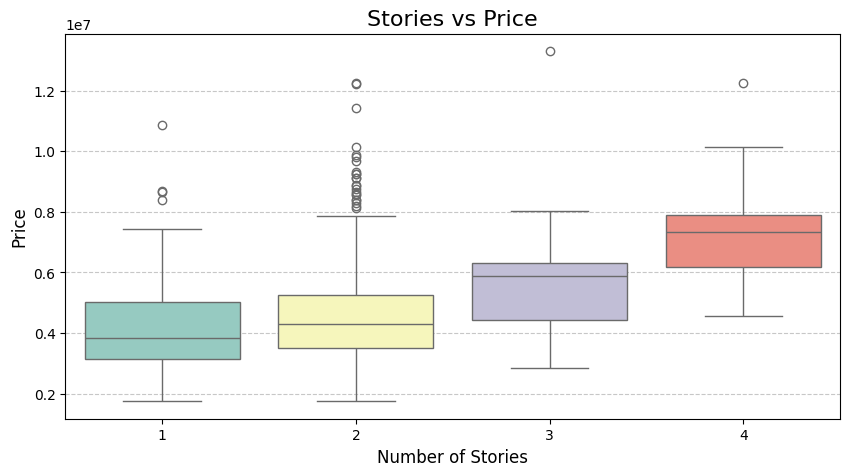

In [8]:
# 4. Boxplot: Stories vs. Price (Optional Addition)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['stories'], y=df['price'], palette='Set3')
plt.title("Stories vs Price", fontsize=16)
plt.xlabel("Number of Stories", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable h

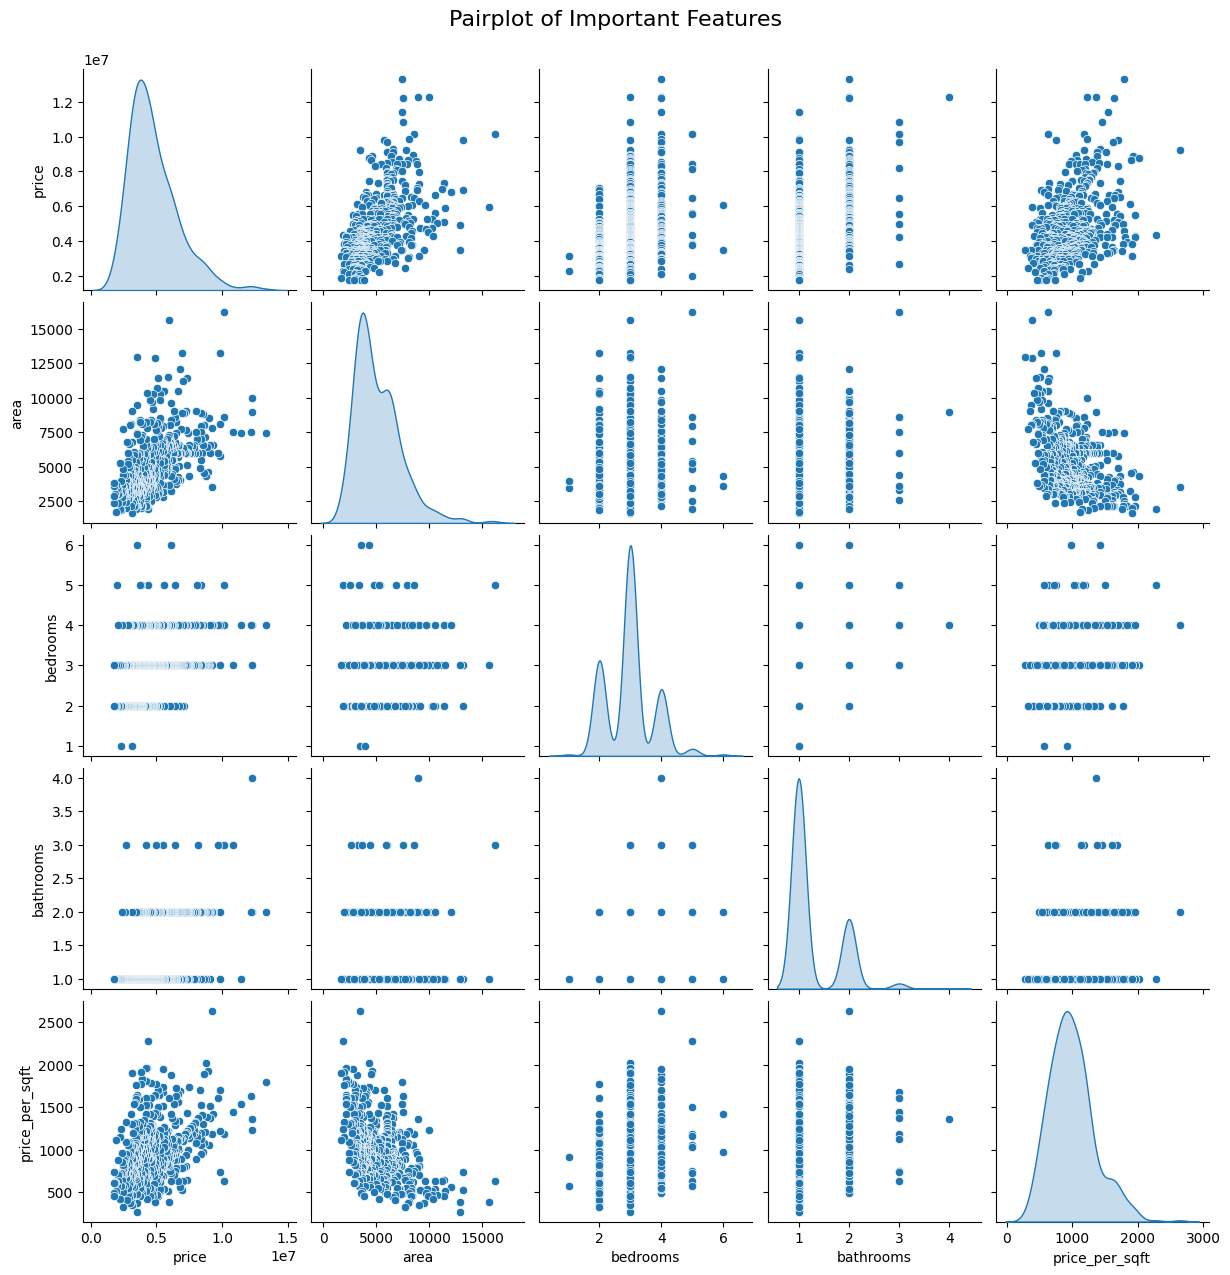

In [9]:
# 5. Pairplot for Relationships Between Features
important_features = ['price', 'area', 'bedrooms', 'bathrooms', 'price_per_sqft']
sns.pairplot(df[important_features], diag_kind='kde', palette='husl')
plt.suptitle("Pairplot of Important Features", y=1.02, fontsize=16)
plt.show()

In [10]:
# Handle missing values
df = df.dropna()

### ==========================
### Step 4: Data Preprocessing (Encoding & Scaling)
### ==========================

In [11]:
# Convert categorical variables using One-Hot Encoding
categorical_columns = df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
categorical_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_columns]))
categorical_encoded.columns = encoder.get_feature_names_out()

In [12]:
# Drop original categorical columns and add encoded ones
df = df.drop(columns=categorical_columns, errors='ignore')
df = pd.concat([df, categorical_encoded], axis=1)
print("Dataset After One-Hot Encoding:")
df.head()

Dataset After One-Hot Encoding:


,price,area,bedrooms,bathrooms,stories,parking,price_per_sqft,total_bathrooms,bed_bath_ratio,mainroad_no,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1792.452830,5,1.333333,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,12250000,8960,4,4,4,3,1367.187500,8,0.800000,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,1229.919679,4,1.000000,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,12215000,7500,4,2,2,3,1628.666667,4,1.333333,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,11410000,7420,4,1,2,2,1537.735849,3,2.000000,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [13]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to scale (excluding target variable 'price')
numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking',
                     'price_per_sqft', 'total_bathrooms', 'bed_bath_ratio']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display dataset after scaling
print("Dataset After Scaling:")
df.head()


Dataset After Scaling:


,price,area,bedrooms,bathrooms,stories,parking,price_per_sqft,total_bathrooms,bed_bath_ratio,mainroad_no,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,1.046726,1.403419,1.421812,1.378217,1.517692,2.308152,1.682086,0.023522,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,12250000,1.757010,1.403419,5.405809,2.532024,2.679409,1.079838,4.326520,-1.542206,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,12250000,2.218232,0.047278,1.421812,0.224410,1.517692,0.683361,0.800608,-0.955058,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,12215000,1.083624,1.403419,1.421812,0.224410,2.679409,1.835081,0.800608,0.023522,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,11410000,1.046726,1.403419,-0.570187,0.224410,1.517692,1.572441,-0.080870,1.980682,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


### ==========================
### Step 5: Define Features and Target Variable
### ==========================

In [14]:
X = df.drop(columns=["price"], errors='ignore')
y = df["price"]

In [15]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### ==========================
### Step 6: PCA for Dimensionality Reduction
### ==========================

In [17]:
# Apply PCA to reduce dimensionality (retain 95% variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Number of Principal Components Retained: {pca.n_components_}")


Number of Principal Components Retained: 11


### ==========================
### Step 7: Train and Evaluate Multiple Models
### ==========================

In [18]:
# Define individual models for comparison
!pip install xgboost
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=5),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5),
    "XGBoost": xgb.XGBRegressor()
}

In [19]:
# Define the Stacking Model
stacked_model = StackingRegressor(
    estimators=[
        ("rf", RandomForestRegressor(n_estimators=200, max_depth=20)),
        ("dt", DecisionTreeRegressor()),
    ],
    final_estimator=GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5),
)

# Add the Stacking Model to the models dictionary
models["Stacking Model"] = stacked_model

### ==========================
### Step 8: Model Training and Performance Evaluation
### ==========================

In [20]:
# Initialize results storage
results = []
y_preds = {}

# Train and evaluate individual models
for name, model in models.items():
    print(f"Training and evaluating: {name}...")
    model.fit(X_train_scaled, y_train)  # Train the model
    y_pred = model.predict(X_test_scaled)  # Predict on test set
    y_preds[name] = y_pred  # Store predictions

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Append results
    results.append([name, r2, mae, mse, rmse])

Training and evaluating: Linear Regression...
Training and evaluating: Decision Tree...
Training and evaluating: Random Forest...
Training and evaluating: Gradient Boosting...
Training and evaluating: XGBoost...
Training and evaluating: Stacking Model...


In [21]:
# Train XGBoost separately
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', n_estimators=200, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train_scaled, y_train)
y_preds["XGBoost"] = xgb_model.predict(X_test_scaled)

r2 = r2_score(y_test, y_preds["XGBoost"])
mae = mean_absolute_error(y_test, y_preds["XGBoost"])
mse = mean_squared_error(y_test, y_preds["XGBoost"])
rmse = np.sqrt(mse)
results.append(["XGBoost", r2, mae, mse, rmse])

In [22]:
# Convert results into a DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "MAE", "MSE", "RMSE"])

In [23]:
# Display the results
print("\nModel Performance Comparison:\n")
print(results_df.sort_values(by="R2 Score", ascending=False))


Model Performance Comparison:

               Model  R2 Score            MAE           MSE           RMSE
3  Gradient Boosting  0.953017  247664.868493  2.374798e+11  487318.963638
6            XGBoost  0.948651  260682.937500  2.595487e+11  509459.231798
4            XGBoost  0.944557  284086.062500  2.802427e+11  529379.527281
2      Random Forest  0.928835  314971.951254  3.597100e+11  599758.305138
1      Decision Tree  0.883315  444403.669725  5.897948e+11  767980.985167
0  Linear Regression  0.882314  502353.798825  5.948533e+11  771267.353876
5     Stacking Model  0.861558  469729.517515  6.997649e+11  836519.529950


In [24]:
# Convert price into categories
price_bins = [0, 3000000, 6000000, df['price'].max()]
price_labels = ['Low', 'Medium', 'High']
df['price_category'] = pd.cut(df['price'], bins=price_bins, labels=price_labels)

# Encode categories into numbers
label_encoder = LabelEncoder()
df['price_category_encoded'] = label_encoder.fit_transform(df['price_category'])

In [25]:
# Define classification features (X) and target (y)
X_classification = df.drop(columns=['price', 'price_category', 'price_category_encoded'])
y_classification = df['price_category_encoded']

# Split data into training and testing sets
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42)


In [26]:
# Train a classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_classification, y_train_classification)

# Make predictions
y_pred_classification = classifier.predict(X_test_classification)


In [27]:
# Compute classification metrics
conf_matrix = confusion_matrix(y_test_classification, y_pred_classification)
accuracy = accuracy_score(y_test_classification, y_pred_classification)
precision = precision_score(y_test_classification, y_pred_classification, average='weighted')
recall = recall_score(y_test_classification, y_pred_classification, average='weighted')

# Print results
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Confusion Matrix:
 [[23  0  9]
 [ 0  5 14]
 [ 0  3 55]]
Accuracy: 0.76
Precision: 0.78
Recall: 0.76


### ==========================
### Step 9: Visualization of Model Performance
### ==========================

<ipython-input-28-58a107928322>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df["Model"], y=results_df["R2 Score"], palette="viridis")


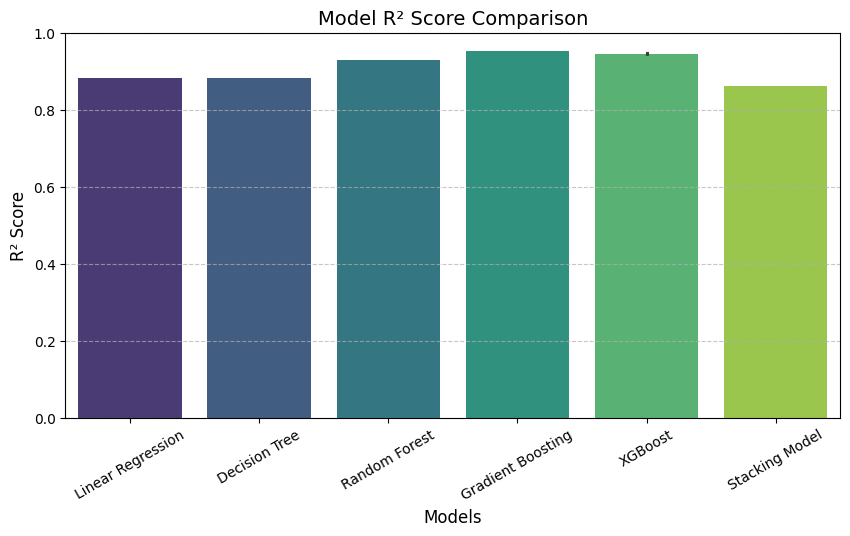

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df["Model"], y=results_df["R2 Score"], palette="viridis")
plt.xticks(rotation=30, fontsize=10)
plt.title("Model R² Score Comparison", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

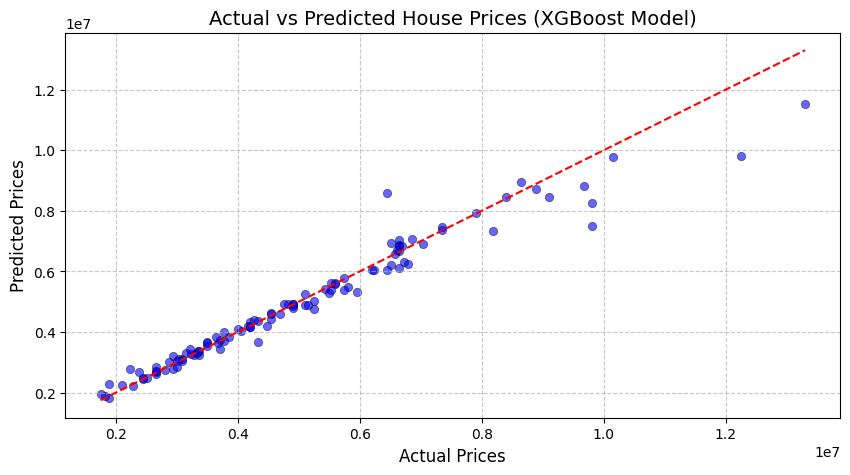

In [29]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_preds["XGBoost"], alpha=0.6, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title("Actual vs Predicted House Prices (XGBoost Model)", fontsize=14)
plt.xlabel("Actual Prices", fontsize=12)
plt.ylabel("Predicted Prices", fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

### ==========================
### Step 10: Prediction Function for New Data
### ==========================

In [30]:
def predict_house_price(input_data):
    """
    Predict house price based on input features.

    :param input_data: DataFrame containing house features (same format as training data).
    :return: Predicted price.
    """
    # Scale the input data
    input_scaled = scaler.transform(input_data)

    # Predict using the trained XGBoost model
    prediction = xgb_model.predict(input_scaled)

    return prediction

In [31]:
# Example prediction input
# Example prediction input
example_input = pd.DataFrame([X_test.iloc[0]])  # Taking one row from the test set
predicted_price = predict_house_price(example_input)

# Display the predicted price
print("Predicted House Price:", predicted_price[0])

Predicted House Price: 4019750.0
